In [ ]:
import graphviz
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn import metrics 
from sklearn import datasets
from sklearn import tree  

In [ ]:
#1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 

In [ ]:
#Read the data
data = pd.read_csv("titanic-passengers.csv", sep = ";")
data.head

<bound method NDFrame.head of      PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0            343       No       2  ...  13.0000    NaN         S
1             76       No       3  ...   7.6500  F G73         S
2            641       No       3  ...   7.8542    NaN         S
3            568       No       3  ...  21.0750    NaN         S
4            672       No       1  ...  52.0000    B71         S
..           ...      ...     ...  ...      ...    ...       ...
886           10      Yes       2  ...  30.0708    NaN         C
887           61       No       3  ...   7.2292    NaN         C
888          535       No       3  ...   8.6625    NaN         S
889          102       No       3  ...   7.8958    NaN         S
890          428      Yes       2  ...  26.0000    NaN         S

[891 rows x 12 columns]>

In [ ]:
#Data cleaning and preprocessing

data['Age'] = data['Age'].fillna((data['Age'].mean()))
data["Cabin"].fillna('G6', inplace=True)
data["Embarked"] = data["Embarked"].fillna('C')

#We delete the useless features
data = data.drop(columns = 'Name')
data = data.drop(columns = 'PassengerId')

#We replace the categorical data with numerical one
data['Survived'].replace(['No','Yes'], [0,1], inplace=True)
data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)

#Transform the categorical data to numerical data
encoder=LabelEncoder()
data['Cabin']=encoder.fit_transform(data['Cabin'])
data['Ticket']=encoder.fit_transform(data['Ticket'])


data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,0,28.0,0,0,159,13.0000,145,0
1,0,3,0,25.0,0,0,347,7.6500,140,0
2,0,3,0,20.0,0,0,409,7.8542,145,0
3,0,3,1,29.0,0,4,395,21.0750,145,0
4,0,1,0,31.0,1,0,569,52.0000,38,0


In [ ]:
x=data[['Sex','Pclass','Age']]
y=data['Survived']


In [ ]:
#Training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy : ', accuracy_score(y_test,y_pred))
print('f1 score : ', f1_score(y_test,y_pred))
print('precision_score : ', precision_score(y_test,y_pred))

Accuracy :  0.547486033519553


NameError: ignored

In [ ]:
max_depth = [3,4,5,6,7]

training_acc_val = []
validation_acc_val = []

for max_depth_val in max_depth:

  model = DecisionTreeClassifier(random_state = 2, max_depth = max_depth_val)
  model.fit(X_train,y_train)

  y_predicted_val = model.predict(X_train)
  y_predicted = model.predict(X_test)

  acc_val = accuracy_score(y_train,y_predicted_val)
  acc_test = accuracy_score(y_test, y_predicted)

  validation_acc_val.append(acc_val)
  training_acc_val.append(acc_test)

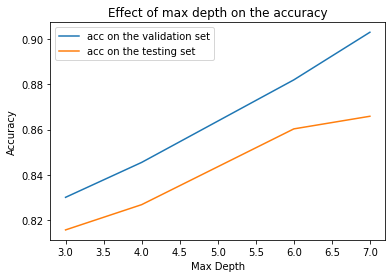

In [ ]:
plt.plot(max_depth, validation_acc_val,label = 'acc on the validation set')
plt.plot(max_depth, training_acc_val,label = 'acc on the testing set')
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max depth on the accuracy")
plt.show()

In [ ]:
#The best max depth is 7

In [ ]:
model = DecisionTreeClassifier(random_state = 5, max_depth = 7)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [ ]:
y_predicted_val=mo.predict(X_train)
print("The model accuracy on the Validation set : ", accuracy_score(y_train,y_predicted_val))

y_predicted = clf.predict(X_test)
print("The model accuracy on the testing set : ", accuracy_score(y_test, y_predicted))

The model accuracy on the Validation set :  0.8974719101123596
The model accuracy on the testing set :  0.8715083798882681


In [ ]:
#2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

[Text(1123.875, 1528.875, 'X[1] <= 0.5\ngini = 0.476\nsamples = 712\nvalue = [434, 278]'),
 Text(564.75, 1325.025, 'X[7] <= 124.5\ngini = 0.316\nsamples = 458\nvalue = [368, 90]'),
 Text(360.0, 1121.175, 'X[7] <= 113.5\ngini = 0.5\nsamples = 73\nvalue = [37, 36]'),
 Text(324.0, 917.3249999999999, 'X[5] <= 352.5\ngini = 0.493\nsamples = 66\nvalue = [37, 29]'),
 Text(180.0, 713.475, 'X[5] <= 32.0\ngini = 0.496\nsamples = 44\nvalue = [20, 24]'),
 Text(72.0, 509.625, 'X[2] <= 28.5\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(36.0, 305.7750000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(108.0, 305.7750000000001, 'X[8] <= 0.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(72.0, 101.92499999999995, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(144.0, 101.92499999999995, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(288.0, 509.625, 'X[3] <= 1.5\ngini = 0.437\nsamples = 31\nvalue = [10, 21]'),
 Text(252.0, 305.7750000000001, 'X[5] <= 92.0\ngini = 0.4\nsample

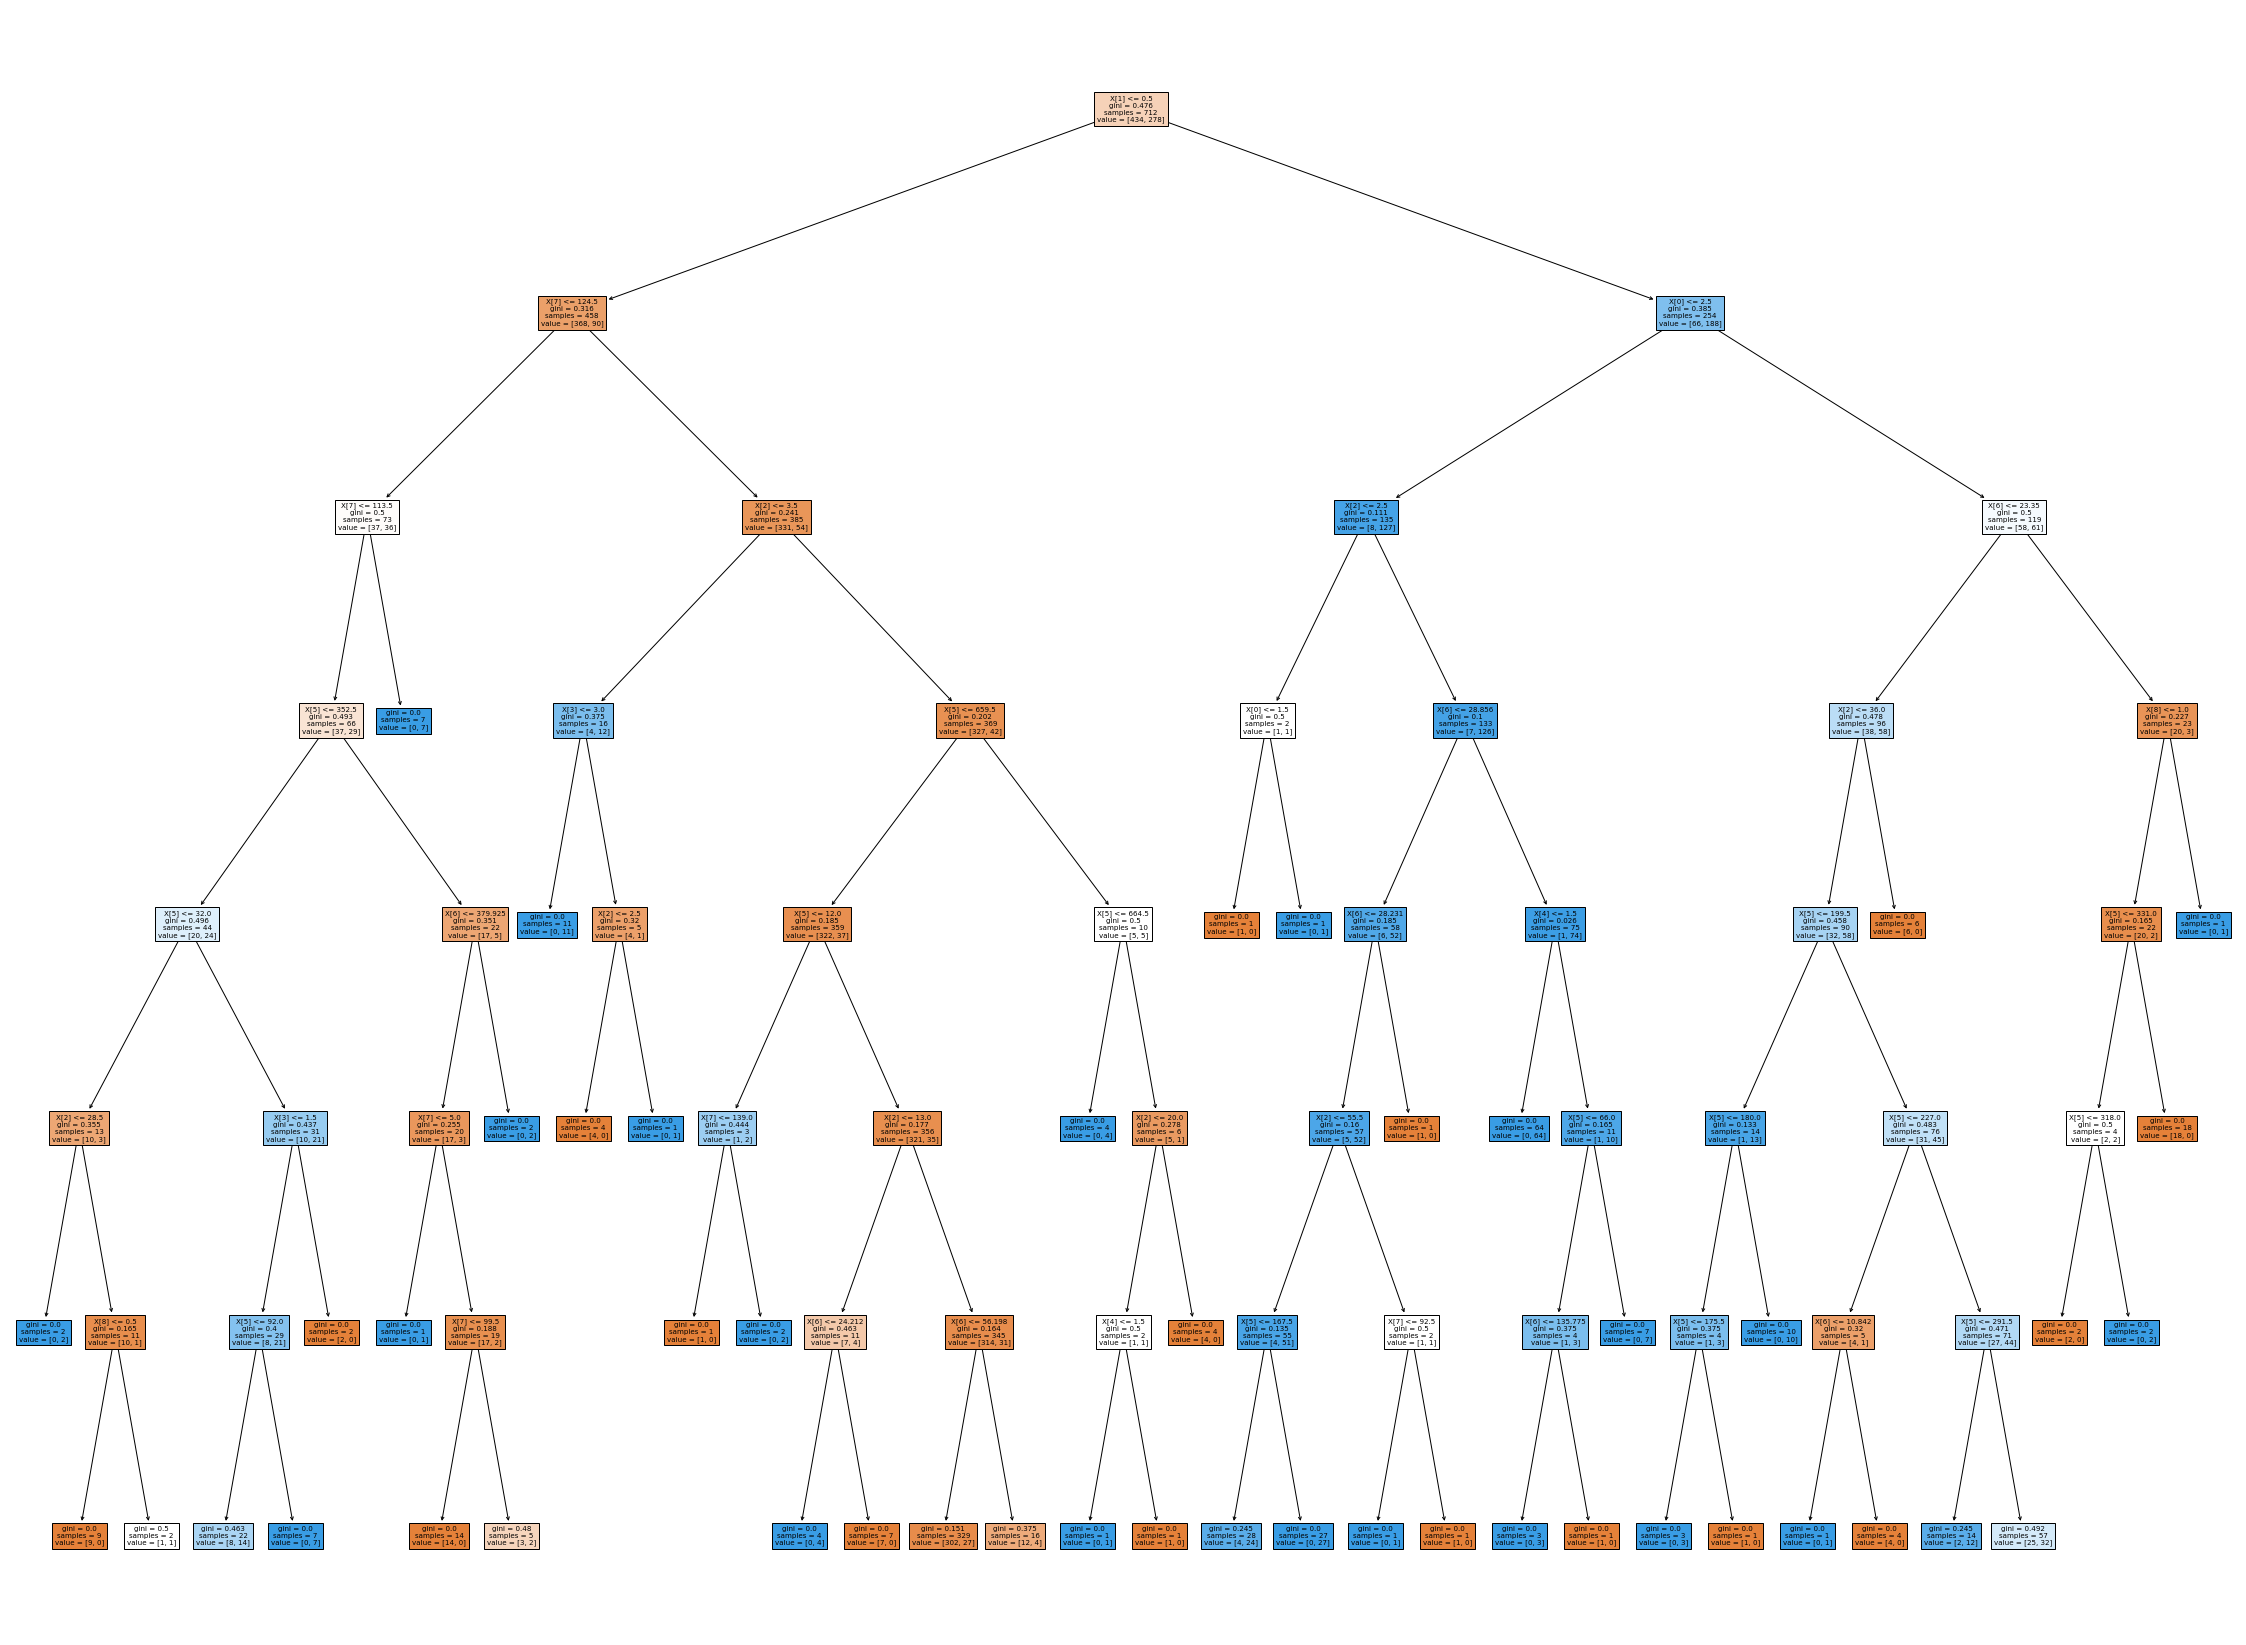

In [ ]:
from sklearn import tree
plt.figure(figsize = (40,30))
tree.plot_tree(clf, filled = True)

In [ ]:
print(tree.export_text(clf))

|--- feature_1 <= 0.50
|   |--- feature_7 <= 121.50
|   |   |--- feature_7 <= 114.50
|   |   |   |--- feature_6 <= 29.10
|   |   |   |   |--- feature_7 <= 100.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  100.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  29.10
|   |   |   |   |--- feature_5 <= 317.50
|   |   |   |   |   |--- feature_5 <= 36.50
|   |   |   |   |   |   |--- feature_6 <= 93.30
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  93.30
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  36.50
|   |   |   |   |   |   |--- feature_2 <= 34.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  34.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  317.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- feature_7 

In [ ]:
#3. Change the decision tree parameters(change at least two parameters)

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", splitter="random")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
#4. Calculate the new accuracy and compare it with the previous results. 

In [92]:
model_1 = DecisionTreeClassifier(criterion="entropy", splitter="random")
model_1.fit(X_train,y_train)
new_y_predicted_val = model_1.predict(X_train)
print("The model accuracy on the Validation set : ",accuracy_score(y_train, new_y_predicted_val))
new_y_predicted = model_1.predict(X_test)
print("The model accuracy on the testing set : ",accuracy_score(y_test, new_y_predicted))

The model accuracy on the Validation set :  1.0
The model accuracy on the testing set :  0.9497206703910615


In [93]:
print("The model accuracy on the Validation set with random state = 4 & max_depth = 7 : ", accuracy_score(y_train,y_predicted_val))
print("The model accuracy on the Validation set with random state = 4 & max_depth = 5 : ", accuracy_score(y_train,y_predicted_val_depth_5))
print("The model accuracy on the Validation set with random state = 10 & max_depth = 7 : ", accuracy_score(y_train,y_predicted_val_random_state_10))

The model accuracy on the Validation set with random state = 4 & max_depth = 7 :  0.9030898876404494
The model accuracy on the Validation set with random state = 4 & max_depth = 5 :  0.5210674157303371
The model accuracy on the Validation set with random state = 10 & max_depth = 7 :  0.5182584269662921


In [ ]:
#5. Use random forest then change the number of estimators

In [94]:
model = RandomForestClassifier(n_estimators = 10)  
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.9385474860335196


In [95]:
model = RandomForestClassifier(n_estimators = 90)  
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.9497206703910615


In [96]:
model = RandomForestClassifier(n_estimators = 15)  
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.9497206703910615


In [ ]:
#We got 96% which means thant the random forest algorithm is more efficient than the decision tree.
#Even if we change the number of estimator, we still get almost the same result.
#We also notice that the results we got after increasing the number of the estimators are smaller than the other results. 